# 要预测[6,7,8,9,10,11]
## 首先从时间上提取特征最近1，2，3天同一时间段20分钟mean max min median
## 最近-------------------------------------------------------------40分钟mean max min median
## 最近-------------------------------------------------------------60分钟mean max min median

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import util as util
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

In [11]:
train = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/training_20min_avg_travel_time-Copy1.csv")
train['start_time'] = train['time_window'].apply(lambda x :(x.split(','))[0][1:])
train['start_time'] = pd.to_datetime(train['start_time'])
# Turn A,B,C to 1,2,3
train.replace('B',2,inplace=True)
train.replace('A',1,inplace=True)
train.replace('C',3,inplace=True)
train.drop(['time_window'],axis=1,inplace=True)

In [12]:
def get_date_list(start, end, toFormat):
    date_list = []
    date = datetime.datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(end, '%Y-%m-%d %H:%M:%S')
    while date <= end:
        date_list.append(date.strftime(toFormat))
        date = date + datetime.timedelta(minutes=20)
    return date_list


In [13]:
Test_Data = pd.read_csv("cv_Test_Data.csv")

In [14]:
test = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/test1_20min_avg_travel_time.csv")
test['start_time'] = test['time_window'].apply(lambda x :(x.split(','))[0][1:])
test['start_time'] = pd.to_datetime(test['start_time'])
# Turn A,B,C to 1,2,3
test.replace('B',2,inplace=True)
test.replace('A',1,inplace=True)
test.replace('C',3,inplace=True)
test.drop(['time_window'],axis=1,inplace=True)

In [20]:
import warnings

In [27]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [67]:
import knn 

In [107]:
def RunLasoOnCv(intersection_id,tollgate_id,train,Test_Data,isMorning):   
    start_time = []
    end_time = []
    if (isMorning):
            train_Time = np.array([pd.datetime(2016, 7, 18, 6, 0, 0), pd.datetime(2016, 7, 18, 9, 40, 0)])
            test_Time = np.array([pd.datetime(2016, 10, 11, 6, 0, 0), pd.datetime(2016, 10, 11, 9, 40, 0)])
            MoriningTime = []
            MoriningTime1 = get_date_list('2016-10-11 08:00:00', '2016-10-11 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime2 = get_date_list('2016-10-12 08:00:00', '2016-10-12 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime3 = get_date_list('2016-10-13 08:00:00', '2016-10-13 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime4 = get_date_list('2016-10-14 08:00:00', '2016-10-14 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime5 = get_date_list('2016-10-15 08:00:00', '2016-10-15 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime6 = get_date_list('2016-10-16 08:00:00', '2016-10-16 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime7 = get_date_list('2016-10-17 08:00:00', '2016-10-17 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTimeSet = [MoriningTime1,MoriningTime2,MoriningTime3,MoriningTime4,MoriningTime5,MoriningTime6,MoriningTime7]

            MoriningEndTime = []
            MoriningEndTime1 = get_date_list('2016-10-11 08:20:00', '2016-10-11 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime2 = get_date_list('2016-10-12 08:20:00', '2016-10-12 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime3 = get_date_list('2016-10-13 08:20:00', '2016-10-13 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime4 = get_date_list('2016-10-14 08:20:00', '2016-10-14 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime5 = get_date_list('2016-10-15 08:20:00', '2016-10-15 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime6 = get_date_list('2016-10-16 08:20:00', '2016-10-16 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime7 = get_date_list('2016-10-17 08:20:00', '2016-10-17 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTimeSet = [MoriningEndTime1,MoriningEndTime2,MoriningEndTime3,MoriningEndTime4,MoriningEndTime5,MoriningEndTime6,MoriningEndTime7]
            for y in MoriningTimeSet:
                for x in y:
                    MoriningTime.append(x)
            for y in MoriningEndTimeSet:
                for x in y:
                    MoriningEndTime.append(x)        
            start_time = MoriningTime  
            end_time = MoriningEndTime
    else:
            train_Time = np.array([pd.datetime(2016, 7, 18, 15, 0, 0), pd.datetime(2016, 7, 18, 18, 40, 0)])
            test_Time = np.array([pd.datetime(2016, 10, 11, 15, 0, 0), pd.datetime(2016, 10, 11, 18, 40, 0)])
            AfterNoonTime = []    
            AfterNoonTime1 = get_date_list('2016-10-11 17:00:00', '2016-10-11 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime2 = get_date_list('2016-10-12 17:00:00', '2016-10-12 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime3 = get_date_list('2016-10-13 17:00:00', '2016-10-13 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime4 = get_date_list('2016-10-14 17:00:00', '2016-10-14 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime5 = get_date_list('2016-10-15 17:00:00', '2016-10-15 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime6 = get_date_list('2016-10-16 17:00:00', '2016-10-16 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime7 = get_date_list('2016-10-17 17:00:00', '2016-10-17 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTimeSet = [AfterNoonTime1,AfterNoonTime2,AfterNoonTime3,AfterNoonTime4,AfterNoonTime5,AfterNoonTime6,AfterNoonTime7]    
            for y in AfterNoonTimeSet:
                for x in y:
                    AfterNoonTime.append(x)
            AfterNoonEndTime = []
            AfterNoonEndTime1 = get_date_list('2016-10-11 17:20:00', '2016-10-11 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime2 = get_date_list('2016-10-12 17:20:00', '2016-10-12 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime3 = get_date_list('2016-10-13 17:20:00', '2016-10-13 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime4 = get_date_list('2016-10-14 17:20:00', '2016-10-14 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime5 = get_date_list('2016-10-15 17:20:00', '2016-10-15 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime6 = get_date_list('2016-10-16 17:20:00', '2016-10-16 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime7 = get_date_list('2016-10-17 17:20:00', '2016-10-17 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTimeSet = [AfterNoonEndTime1,AfterNoonEndTime2,AfterNoonEndTime3,AfterNoonEndTime4,AfterNoonEndTime5,AfterNoonEndTime6,AfterNoonEndTime7]        
            for y in AfterNoonEndTimeSet:
                for x in y:
                    AfterNoonEndTime.append(x)   
            start_time = AfterNoonTime         
            end_time = AfterNoonEndTime  
            
            
    ts_list = util.TsList(train, intersection_id, tollgate_id, train_Time)
    # 最后7天是测试用的
    ts_list = ts_list[0:len(ts_list) - 7]
    # 此处的过滤策略是：对每天特定时间段的数据求均值与标准差，然后将均值与标准差落在10%分位数以下和90%分位数以上的日子去除
    # 我觉得，去除异常的时候，应该把缺省值给补充回来
#     valid_index = util.ExceptOutlier(ts_list)
    ts_list = pd.DataFrame(ts_list)
#     ts_list = ts_list.ix[valid_index]
    ts_list.drop([0],inplace=True)

    td =util.TsList(Test_Data, intersection_id, tollgate_id, test_Time)
    td_list = pd.DataFrame(td)
    td_list = td_list[0:7]

    all_data = ts_list.merge(td_list,how='outer')

    train = all_data[4:]
    all_data.drop([6,7,8,9,10,11],axis=1,inplace=True)
    col = [0,1,2,3,4,5]
    col1 = [4,5]
    
    col2 = [2,3,4,5]   
    
    all_data['diff_20min_l'] = all_data[5]-all_data[4]
    all_data['diff_40min_l'] = all_data[5]-all_data[3]
    all_data['diff_60min_l'] = all_data[5]-all_data[2]
    
    all_data['max_2H'] = all_data.apply(lambda x: x[col].max(), axis=1)
    all_data['min_2H'] = all_data.apply(lambda x: x[col].min(), axis=1)
    all_data['mean_2H'] = all_data.apply(lambda x: x[col].mean(), axis=1)
    all_data['median_2H'] = all_data.apply(lambda x: x[col].median(), axis=1)
    
    all_data['max_40min'] = all_data.apply(lambda x: x[col1].max(), axis=1)
    all_data['min_40min'] = all_data.apply(lambda x: x[col1].min(), axis=1)

    all_data['max_1H'] = all_data.apply(lambda x: x[col2].max(), axis=1)
    all_data['min_1H'] = all_data.apply(lambda x: x[col2].min(), axis=1)
    all_data['mean_1H'] = all_data.apply(lambda x: x[col2].mean(), axis=1)
    all_data['median_1H'] = all_data.apply(lambda x: x[col2].median(), axis=1)
    
    all_data.drop(col,inplace=True,axis=1)
#     ts_list = train.join(ts_list)

    train.reset_index(inplace=True)
    train.drop(['index'],inplace=True,axis=1)

    ts_list_3 = all_data.copy()
    ts_list_2 = all_data[1:]
    ts_list_1 = all_data[2:]
    ts_list_4 = all_data[3:]
    ts_list_1.rename(columns={'max_2H':'max_2H1','min_2H':'min_2H1','mean_2H':'mean_2H1','median_2H':'median_2H1',
                              'max_40min':'max_40min1','min_40min':'min_40min1',
                              'max_1H':'max_1H1','min_1H':'min_1H1','mean_1H':'mean_1H1','median_1H':'median_1H1',
                            'diff_20min_l':'diff_20min_l1','diff_40min_l':'diff_40min_l1','diff_60min_l':'diff_60min_l1'
                             },inplace=True)
    ts_list_1.reset_index(inplace=True)
    ts_list_1.drop(['index'],inplace=True,axis=1)
    ts_list_2.rename(columns={'max_2H':'max_2H2','min_2H':'min_2H2','mean_2H':'mean_2H2','median_2H':'median_2H2',
                             'max_40min':'max_40min2','min_40min':'min_40min2',
                              'max_1H':'max_1H2','min_1H':'min_1H2','mean_1H':'mean_1H2','median_1H':'median_1H2',
                             'diff_20min_l':'diff_20min_l2','diff_40min_l':'diff_40min_l2','diff_60min_l':'diff_60min_l2'
                             },inplace=True)
    ts_list_2.reset_index(inplace=True)
    ts_list_2.drop(['index'],inplace=True,axis=1)
    ts_list_3.rename(columns={'max_2H':'max_2H3','min_2H':'min_2H3','mean_2H':'mean_2H3','median_2H':'median_2H3',
                             'max_40min':'max_40min3','min_40min':'min_40min3',
                              'max_1H':'max_1H3','min_1H':'min_1H3','mean_1H':'mean_1H3','median_1H':'median_1H3',
                             'diff_20min_l':'diff_20min_l3','diff_40min_l':'diff_40min_l3','diff_60min_l':'diff_60min_l3'
                             },inplace=True)
    ts_list_3.reset_index(inplace=True)
    ts_list_3.drop(['index'],inplace=True,axis=1)
    
    ts_list_4.rename(columns={'max_2H':'max_2H4','min_2H':'min_2H4','mean_2H':'mean_2H4','median_2H':'median_2H4',
                             'max_40min':'max_40min4','min_40min':'min_40min4',
                              'max_1H':'max_1H4','min_1H':'min_1H4','mean_1H':'mean_1H4','median_1H':'median_1H4',
                             'diff_20min_l':'diff_20min_l4','diff_40min_l':'diff_40min_l4','diff_60min_l':'diff_60min_l4'
                             },inplace=True)
    ts_list_4.reset_index(inplace=True)
    ts_list_4.drop(['index'],inplace=True,axis=1)

    train = ts_list_4.join(train)
    train = ts_list_1.join(train)
    train = ts_list_2.join(train)
    train = ts_list_3.join(train)
    

    col =[
           'max_2H3','min_2H3','mean_2H3','median_2H3'
          ,'max_2H2','min_2H2','mean_2H2','median_2H2'
          ,'max_2H1','min_2H1','mean_2H1','median_2H1'
          ,'max_2H4','min_2H4','mean_2H4','median_2H4'
          ,'max_40min4','min_40min4'
          ,'max_40min1','min_40min1'
          ,'max_40min2','min_40min2'
          ,'max_40min3','min_40min3'
          ,'max_1H4','min_1H4','mean_1H4','median_1H4'
          ,'max_1H1','min_1H1','mean_1H1','median_1H1'
          ,'max_1H2','min_1H2','mean_1H2','median_1H2'
          ,'max_1H3','min_1H3','mean_1H3','median_1H3' 
          ,'diff_20min_l1','diff_40min_l1','diff_60min_l1'
          ,'diff_20min_l2','diff_40min_l2','diff_60min_l2'
          ,'diff_20min_l3','diff_40min_l3','diff_60min_l3'
          ,'diff_20min_l4','diff_40min_l4','diff_60min_l4'
           ,0,1,2,3,4,5
    ]
    df = train.dropna()
    
    scaler = StandardScaler()
    for x in col:
            df[x] = scaler.fit_transform(df[x])


    train_df = df[0:len(df)-7]
    test_df = df[len(df)-7:]
    
    label1=[6]
    label2=[7]
    label3=[8]
    label4=[9]
    label5=[10]
    label6=[11]
    label =[label2,label3,label4,label5,label6]
    return train_df[col],train_df[label1]


#     model = lm.Lasso()   
#     model.fit(train_df[col],train_df[label1])
#     result = model.predict(test_df[col])
    
#     result =pd.DataFrame(result)
#     result.rename(columns={0:label1[0]},inplace = True) 
#     for eachLabel in label:
#         model = lm.Lasso()
#         model.fit(train_df[col],train_df[eachLabel])
#         Y_predict = model.predict(test_df[col])
#         Y_predict=pd.DataFrame(Y_predict)
#         Y_predict.rename(columns={0:eachLabel[0]},inplace = True) 
#         result = result.join(Y_predict)
#     avg_travel_time =[]
#     for  x in  result.values:
#         for a in x:
#             avg_travel_time.append(a)   
#     result = pd.DataFrame(columns=["avg_travel_time"],data=avg_travel_time)

#     result['start_time'] = start_time
#     result['end_time'] = end_time 
#     result['intersection_id']=intersection_id
#     result['tollgate_id']=tollgate_id
#     return result

In [109]:
Sum = pd.DataFrame({'avg_travel_time':[],'intersection_id':[],'tollgate_id':[]})
for intersection_id,intersection_id_group in train.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            Morning =  RunLasoOnCv(intersection_id,tollgate_id,train,Test_Data,True)
            Afternoon =  RunLasoOnCv(intersection_id,tollgate_id,train,Test_Data,False)
            Sum = Sum.merge(Morning,how='outer')
            Sum = Sum.merge(Afternoon,how='outer')

In [110]:
True_Data = pd.read_csv('cv_True_Data.csv')

A = Sum.merge(True_Data,on=['start_time','intersection_id','tollgate_id'],how='outer')
A['residual'] = A['avg_travel_time_x']-A['avg_travel_time_y']
A['MAPE'] =(A['residual']/A['avg_travel_time_y']).abs()
A['MAPE'].mean()

0.24044274266489718

In [111]:
# 这里可以看出这种方法用于1，2/1,3/2,1/3,1会比较好，而对于2,3/3,3效果比较差

In [112]:
for intersection_id,intersection_id_group in A.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            print (intersection_id,tollgate_id)
            print (tollgate_id_group['MAPE'].sum())

1 2
19.4526060256
1 3
16.0315507024
2 1
18.9742234677
2 3
27.3034729294
3 1
17.7345178946
3 3
21.6867712834


[0]	train-rmse:81.5872
Will train until train-rmse hasn't improved in 100 rounds.
[20]	train-rmse:68.6791
[40]	train-rmse:58.0356
[60]	train-rmse:49.3258
[80]	train-rmse:42.0006
[100]	train-rmse:35.9581
[120]	train-rmse:30.9106
[140]	train-rmse:26.7607
[160]	train-rmse:23.2786
[180]	train-rmse:20.3697
[200]	train-rmse:17.9573
[220]	train-rmse:15.8804
[240]	train-rmse:14.1821
[260]	train-rmse:12.7347
[280]	train-rmse:11.4739
[300]	train-rmse:10.4356
[320]	train-rmse:9.54918
[340]	train-rmse:8.78819
[360]	train-rmse:8.14469
[380]	train-rmse:7.62246
[400]	train-rmse:7.09103
[420]	train-rmse:6.60034
[440]	train-rmse:6.17248
[460]	train-rmse:5.8106
[480]	train-rmse:5.43444
[500]	train-rmse:5.12488
[520]	train-rmse:4.78243
[540]	train-rmse:4.48285
[560]	train-rmse:4.20691
[580]	train-rmse:3.96872
[600]	train-rmse:3.77318
[620]	train-rmse:3.55736
[640]	train-rmse:3.36016
[660]	train-rmse:3.14049
[680]	train-rmse:2.93691
[700]	train-rmse:2.75203
[720]	train-rmse:2.60067
[740]	train-rmse:2.465


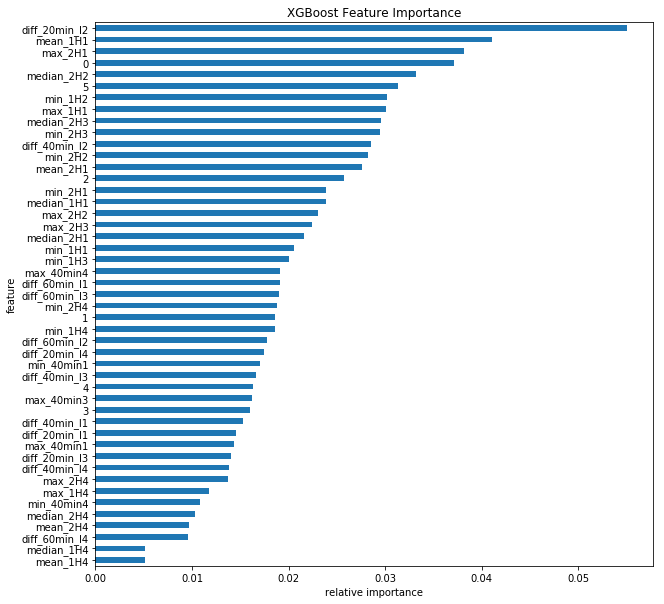

In [106]:
# 挑选其中的1处地方的早上数据，进行计算特征的重要性

X,y =  RunLasoOnCv(1,2,train,Test_Data,True)

import xgboost as xgb
depth = 6
eta = 0.01
ntrees = 6000
mcw = 3
params = {"objective": "reg:linear",
          "booster": "gbtree",
          "eta": eta,
          "max_depth": depth,
          "min_child_weight": mcw,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1
          }
# print "Running with params: " + str(params)
# print "Running with ntrees: " + str(ntrees)
# print "Running with features: " + str(features)
# Train model with local split
tsize = 0.05

dtrain = xgb.DMatrix(X,y)
watchlist = [(dtrain, 'train')]
gbm = xgb.train(params, dtrain, ntrees,  evals=watchlist,early_stopping_rounds=100, verbose_eval=20)

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()
import operator
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# XGB feature importances
# Based on https://www.kaggle.com/mmueller/liberty-mutual-group-property-inspection-prediction/xgb-feature-importance-python/code
features = X.columns
create_feature_map(features)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
featp = df.plot(kind='barh', x=u'feature', y=u'fscore', legend=False, figsize=(10, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
fig_featp = featp.get_figure()
fig_featp.savefig('feature_importance_xgb.png', bbox_inches='tight', pad_inches=1)
# drawXgbWeight(train,gbm)    
plt.show()

In [66]:
def ComputeMeanValue(Test_Data,intersection_id,tollgate_id,isMorning):
    start_time = []
    end_time = []
    if (isMorning):
            train_Time = np.array([pd.datetime(2016, 7, 18, 6, 0, 0), pd.datetime(2016, 7, 18, 9, 40, 0)])
            test_Time = np.array([pd.datetime(2016, 10, 11, 6, 0, 0), pd.datetime(2016, 10, 11, 9, 40, 0)])
            MoriningTime = []
            MoriningTime1 = get_date_list('2016-10-11 08:00:00', '2016-10-11 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime2 = get_date_list('2016-10-12 08:00:00', '2016-10-12 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime3 = get_date_list('2016-10-13 08:00:00', '2016-10-13 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime4 = get_date_list('2016-10-14 08:00:00', '2016-10-14 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime5 = get_date_list('2016-10-15 08:00:00', '2016-10-15 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime6 = get_date_list('2016-10-16 08:00:00', '2016-10-16 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTime7 = get_date_list('2016-10-17 08:00:00', '2016-10-17 09:40:00','%Y-%m-%d %H:%M:%S')
            MoriningTimeSet = [MoriningTime1,MoriningTime2,MoriningTime3,MoriningTime4,MoriningTime5,MoriningTime6,MoriningTime7]

            MoriningEndTime = []
            MoriningEndTime1 = get_date_list('2016-10-11 08:20:00', '2016-10-11 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime2 = get_date_list('2016-10-12 08:20:00', '2016-10-12 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime3 = get_date_list('2016-10-13 08:20:00', '2016-10-13 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime4 = get_date_list('2016-10-14 08:20:00', '2016-10-14 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime5 = get_date_list('2016-10-15 08:20:00', '2016-10-15 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime6 = get_date_list('2016-10-16 08:20:00', '2016-10-16 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTime7 = get_date_list('2016-10-17 08:20:00', '2016-10-17 10:00:00','%Y-%m-%d %H:%M:%S')
            MoriningEndTimeSet = [MoriningEndTime1,MoriningEndTime2,MoriningEndTime3,MoriningEndTime4,MoriningEndTime5,MoriningEndTime6,MoriningEndTime7]
            for y in MoriningTimeSet:
                for x in y:
                    MoriningTime.append(x)
            for y in MoriningEndTimeSet:
                for x in y:
                    MoriningEndTime.append(x)        
            start_time = MoriningTime  
            end_time = MoriningEndTime
    else:
            train_Time = np.array([pd.datetime(2016, 7, 18, 15, 0, 0), pd.datetime(2016, 7, 18, 18, 40, 0)])
            test_Time = np.array([pd.datetime(2016, 10, 11, 15, 0, 0), pd.datetime(2016, 10, 11, 18, 40, 0)])
            AfterNoonTime = []    
            AfterNoonTime1 = get_date_list('2016-10-11 17:00:00', '2016-10-11 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime2 = get_date_list('2016-10-12 17:00:00', '2016-10-12 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime3 = get_date_list('2016-10-13 17:00:00', '2016-10-13 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime4 = get_date_list('2016-10-14 17:00:00', '2016-10-14 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime5 = get_date_list('2016-10-15 17:00:00', '2016-10-15 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime6 = get_date_list('2016-10-16 17:00:00', '2016-10-16 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTime7 = get_date_list('2016-10-17 17:00:00', '2016-10-17 18:40:00','%Y-%m-%d %H:%M:%S')
            AfterNoonTimeSet = [AfterNoonTime1,AfterNoonTime2,AfterNoonTime3,AfterNoonTime4,AfterNoonTime5,AfterNoonTime6,AfterNoonTime7]    
            for y in AfterNoonTimeSet:
                for x in y:
                    AfterNoonTime.append(x)
            AfterNoonEndTime = []
            AfterNoonEndTime1 = get_date_list('2016-10-11 17:20:00', '2016-10-11 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime2 = get_date_list('2016-10-12 17:20:00', '2016-10-12 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime3 = get_date_list('2016-10-13 17:20:00', '2016-10-13 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime4 = get_date_list('2016-10-14 17:20:00', '2016-10-14 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime5 = get_date_list('2016-10-15 17:20:00', '2016-10-15 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime6 = get_date_list('2016-10-16 17:20:00', '2016-10-16 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTime7 = get_date_list('2016-10-17 17:20:00', '2016-10-17 19:00:00','%Y-%m-%d %H:%M:%S')
            AfterNoonEndTimeSet = [AfterNoonEndTime1,AfterNoonEndTime2,AfterNoonEndTime3,AfterNoonEndTime4,AfterNoonEndTime5,AfterNoonEndTime6,AfterNoonEndTime7]        
            for y in AfterNoonEndTimeSet:
                for x in y:
                    AfterNoonEndTime.append(x)   
            start_time = AfterNoonTime         
            end_time = AfterNoonEndTime  
    td =util.TsList(Test_Data,intersection_id,tollgate_id, test_Time)
    td_list = pd.DataFrame(td)
    
    td_list = td_list[7:14]

    DropCol = [0,1,2,3,4,5] 
#     这里使用窗口为2H的滑动平均
#     col6 = [0,1,2,3,4,5]
#     col7 = [1,2,3,4,5,6]
#     col8 = [2,3,4,5,6,7]
#     col9 = [3,4,5,6,7,8]
#     col10 = [4,5,6,7,8,9]
#     col11 = [5,6,7,8,9,10]
#     这里使用窗口为1H的滑动平均
#     col6 = [3,4,5]
#     col7 = [4,5,6]
#     col8 = [5,6,7]
#     col9 = [6,7,8]
#     col10 = [7,8,9]
#     col11 = [8,9,10]
#     这里使用窗口为40min的滑动平均
    col6 = [4,5]
    col7 = [5,6]
    col8 = [6,7]
    col9 = [7,8]
    col10 = [8,9]
    col11 = [9,10]

    td_list[6] = td_list.apply(lambda k :k[col6].mean(),axis=1)
    td_list[7] = td_list.apply(lambda k :k[col7].mean(),axis=1)
    td_list[8] = td_list.apply(lambda k :k[col8].mean(),axis=1)
    td_list[9] = td_list.apply(lambda k :k[col9].mean(),axis=1)
    td_list[10] = td_list.apply(lambda k :k[col10].mean(),axis=1)
    td_list[11] = td_list.apply(lambda k :k[col11].mean(),axis=1) 
    
    td_list.drop(DropCol,axis=1,inplace=True)
    avg_travel_time =[]
    for  x in  td_list.values:
        for a in x:
            avg_travel_time.append(a)   
    print len(avg_travel_time)
    result = pd.DataFrame(columns=["avg_travel_time"],data=avg_travel_time)
    result['start_time'] = start_time
    result['intersection_id']=intersection_id
    result['tollgate_id']=tollgate_id
    result['end_time'] = end_time 
    return result

In [41]:
Sum = pd.DataFrame({'avg_travel_time':[],'intersection_id':[],'tollgate_id':[]})
for intersection_id,intersection_id_group in train.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            Morning =  ComputeMeanValue(Test_Data,intersection_id,tollgate_id,True)
            Afternoon =  ComputeMeanValue(Test_Data,intersection_id,tollgate_id,False)
            Sum = Sum.merge(Morning,how='outer')
            Sum = Sum.merge(Afternoon,how='outer')

      0      1      2      3      4      5       6        7         8   \
0  44.41  32.56  63.51  65.71  60.31  50.97  55.640  53.3050  54.47250   
1  49.68  45.53  69.16  52.01  58.42  63.15  60.785  61.9675  61.37625   
2  54.31  77.89  55.53  55.55  67.91  87.81  77.860  82.8350  80.34750   
3  57.94  62.66  72.25  53.03  65.20  87.40  76.300  81.8500  79.07500   
4  57.38  14.97  14.97  19.88  68.57  65.34  66.955  66.1475  66.55125   
5  44.35  43.37  39.00  73.32  60.51  49.07  54.790  51.9300  53.36000   
6  43.74  48.09  56.39  54.17  65.04  72.16  68.600  70.3800  69.49000   

          9          10         11  
0  53.888750  54.180625  54.034688  
1  61.671875  61.524062  61.597969  
2  81.591250  80.969375  81.280313  
3  80.462500  79.768750  80.115625  
4  66.349375  66.450313  66.399844  
5  52.645000  53.002500  52.823750  
6  69.935000  69.712500  69.823750  
42
      0      1      2      3      4      5       6        7         8   \
0  72.36  61.45  80.86  66.97  85.

In [585]:
True_Data = pd.read_csv('cv_True_Data.csv')

A = Sum.merge(True_Data,on=['start_time','intersection_id','tollgate_id'],how='outer')
A['residual'] = A['avg_travel_time_x']-A['avg_travel_time_y']
A['MAPE'] =(A['residual']/A['avg_travel_time_y']).abs()
A['MAPE'].mean()

0.22225709928142967

In [586]:
for intersection_id,intersection_id_group in A.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            print intersection_id,tollgate_id
            print tollgate_id_group['MAPE'].sum()

1 2
18.2924262882
1 3
18.5375097191
2 1
18.108225568
2 3
19.0615057957
3 1
16.7295211969
3 3
21.28838947


# 汇总

In [510]:
col =['max_2H3','min_2H3','mean_2H3','median_2H3'
      ,'max_2H2','min_2H2','mean_2H2','median_2H2'
      ,'max_2H1','min_2H1','mean_2H1','median_2H1'
      ,'max_40min1','min_40min1'
      ,'max_40min2','min_40min2'
      ,'max_40min3','min_40min3'
      ,'max_1H1','min_1H1','mean_1H1','median_1H1'
      ,'max_1H2','min_1H2','mean_1H2','median_1H2'
      ,'max_1H3','min_1H3','mean_1H3','median_1H3' 
      ,0,1,2,3,4,5]

score 0.22717297456691868
1. 1 2
  15.9345976175
2. 1 3
  16.3820658331
3. 2 1
  17.2915846091
4. 2 3
  25.3965844307
5. 3 1
  16.5888537635
6. 3 3
  22.9014929277

In [511]:
col =['max_2H3','min_2H3','mean_2H3','median_2H3'
      ,'max_2H2','min_2H2','mean_2H2','median_2H2'
      ,'max_2H1','min_2H1','mean_2H1','median_2H1'
#           ,'max_40min1','min_40min1'
#           ,'max_40min2','min_40min2'
#           ,'max_40min3','min_40min3'
      ,'max_1H1','min_1H1','mean_1H1','median_1H1'
      ,'max_1H2','min_1H2','mean_1H2','median_1H2'
      ,'max_1H3','min_1H3','mean_1H3','median_1H3' 
      ,0,1,2,3,4,5]

score 0.22966173923140387
1. 1 2
  20.6698276223
2. 1 3
  19.3634937961
3. 2 1
  17.3740684453
4. 2 3
  18.30126539
5. 3 1
  16.0472692974
6. 3 3
  20.7828153668


In [512]:
col =['max_2H3','min_2H3','mean_2H3','median_2H3'
      ,'max_2H2','min_2H2','mean_2H2','median_2H2'
      ,'max_2H1','min_2H1','mean_2H1','median_2H1'
#           ,'max_40min1','min_40min1'
#           ,'max_40min2','min_40min2'
#           ,'max_40min3','min_40min3'
#           ,'max_1H1','min_1H1','mean_1H1','median_1H1'
#           ,'max_1H2','min_1H2','mean_1H2','median_1H2'
#           ,'max_1H3','min_1H3','mean_1H3','median_1H3' 
      ,0,1,2,3,4,5]

score 0.21757242010306072
1.   1 2
    16.0356720662
2.   1 3
    17.3405885434
3.   2 1
    15.9583111244
4.   2 3
    21.9403909266
5.   3 1
    16.6421659803
6.   3 3
    21.739371091

# 使用前2H均值模型进行预测

score 0.22225709928142967
1. 1 2
  18.2924262882
2. 1 3
  18.5375097191
3. 2 1
  18.108225568
4. 2 3
  19.0615057957
5. 3 1
  16.7295211969
6. 3 3
  21.28838947
# 使用前1H均值模型进行预测

score 0.22150439441660569
1. 1 2
  16.668130783
2. 1 3
  18.7684426874
3. 2 1
  19.4107412722
4. 2 3
  18.2017160376
5. 3 1
  16.2544405758
6. 3 3
  22.3347434299
# 使用前40min均值模型进行预测

score 0.22683953438073604
1. 1 2
  16.8015801542
2. 1 3
  18.4610488947
3. 2 1
  20.994792756
4. 2 3
  18.1700629934
5. 3 1
  16.5463695569
6. 3 3
  23.3532709728

# 通过不断地删减特征以及减小窗口大小，对比结果
### 多特征对于12（15.9），13（16.3），会好,明显比均值好（16~18）
### 少特征对于23有显著改善(21.9)，对于21有改善(15.9)，对33会好(21.2)
### 23，33，Lasso都在20以上，而其他都是15-17稳定
### 均值方面12，13，21均为16.0~21，相比lr的12(15.9)，13(16.3)，21(15.9少特征) 差
### 均值上23(18.17)，31(16.54),明显比lr的23（21.9），31(16.58)好
### 至于33一直都在 21~23 采用2H均值可以达到21

### 12，13采用多特征线性回归
### 21 采用少特征线性回归
### 23，31采用均值40min
### 33 采用均值2H
## 待会具体分析各个类别的情况
## 最好画上下午的图对比，哪一些是平缓，哪一些波动比较

In [68]:
Sum = pd.DataFrame({'avg_travel_time':[],'intersection_id':[],'tollgate_id':[]})

In [ ]:
for intersection_id,intersection_id_group in train.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            if intersection_id == 1 and tollgate_id ==3:
                Morning =  RunLasoOnCv(intersection_id,tollgate_id,train,test,True)
                Afternoon =  RunLasoOnCv(intersection_id,tollgate_id,train,test,False)
                Sum = Sum.merge(Morning,how='outer')
                Sum = Sum.merge(Afternoon,how='outer')

d:\python64\lib\site-packages\ipykernel\__main__.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\python64\lib\site-packages\ipykernel\__main__.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\python64\lib\site-packages\ipykernel\__main__.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\python64\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data e

In [73]:
Sum

,avg_travel_time,start_time,intersection_id,tollgate_id,end_time
0,182.060000,2016-10-11 08:00:00,3,3,2016-10-11 08:20:00
1,182.060000,2016-10-11 08:20:00,3,3,2016-10-11 08:40:00
2,182.060000,2016-10-11 08:40:00,3,3,2016-10-11 09:00:00
3,182.060000,2016-10-11 09:00:00,3,3,2016-10-11 09:20:00
4,182.060000,2016-10-11 09:20:00,3,3,2016-10-11 09:40:00
5,182.060000,2016-10-11 09:40:00,3,3,2016-10-11 10:00:00
6,98.030000,2016-10-12 08:00:00,3,3,2016-10-12 08:20:00
7,98.030000,2016-10-12 08:20:00,3,3,2016-10-12 08:40:00
8,98.030000,2016-10-12 08:40:00,3,3,2016-10-12 09:00:00
9,98.030000,2016-10-12 09:00:00,3,3,2016-10-12 09:20:00


In [617]:
True_Data = pd.read_csv('cv_True_Data.csv')

A = Sum.merge(True_Data,on=['start_time','intersection_id','tollgate_id'],how='outer')
A['residual'] = A['avg_travel_time_x']-A['avg_travel_time_y']
A['MAPE'] =(A['residual']/A['avg_travel_time_y']).abs()
A['MAPE'].mean()

0.20690435832403481

In [618]:
A

,avg_travel_time_x,start_time,intersection_id,tollgate_id,end_time,avg_travel_time_y,residual,MAPE
0,126.885000,2016-10-11 08:00:00,2,3,NaN,142.52,-15.635000,0.109704
1,118.822500,2016-10-11 08:20:00,2,3,NaN,93.00,25.822500,0.277661
2,122.853750,2016-10-11 08:40:00,2,3,NaN,136.49,-13.636250,0.099907
3,120.838125,2016-10-11 09:00:00,2,3,NaN,96.54,24.298125,0.251690
4,121.845937,2016-10-11 09:20:00,2,3,NaN,104.09,17.755937,0.170583
5,121.342031,2016-10-11 09:40:00,2,3,NaN,133.37,-12.027969,0.090185
6,113.505000,2016-10-12 08:00:00,2,3,NaN,84.05,29.455000,0.350446
7,133.402500,2016-10-12 08:20:00,2,3,NaN,156.47,-23.067500,0.147424
8,123.453750,2016-10-12 08:40:00,2,3,NaN,207.03,-83.576250,0.403691
9,128.428125,2016-10-12 09:00:00,2,3,NaN,117.82,10.608125,0.090037
